In [13]:
# Imports from __future__ in case we're running Python 2
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

# Our numerical workhorses
import numpy as np
import scipy.integrate

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Seaborn, useful for graphics
import seaborn as sns

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

ModuleNotFoundError: No module named 'bokeh.mpl'

Text(0,0.5,'$\\mathrm{e}^{\\sin{x}}$')

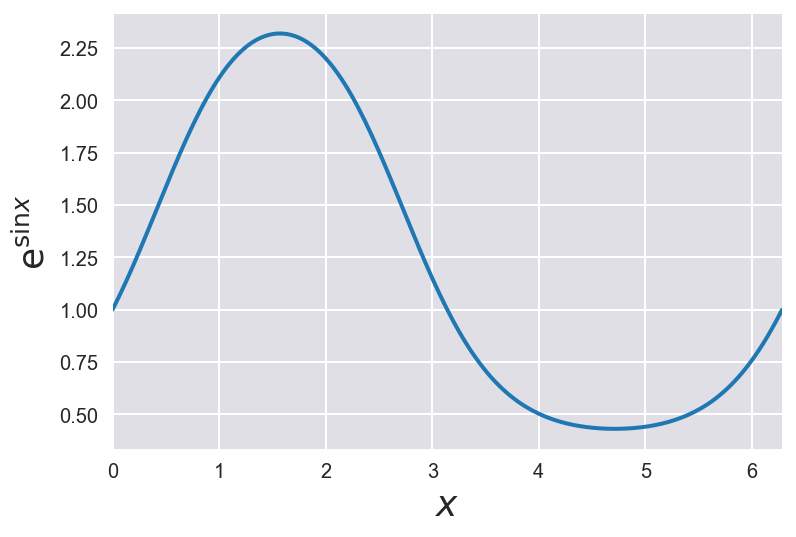

In [9]:
# Generate data to plot
x = np.linspace(0, 2 * np.pi, 200)
y = np.exp(np.sin(np.sin(x)))

# Make plot
plt.plot(x, y)
plt.xlim((0, 2 * np.pi))
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathrm{e}^{\sin{x}}$')

AttributeError: module 'bokeh' has no attribute 'mpl'

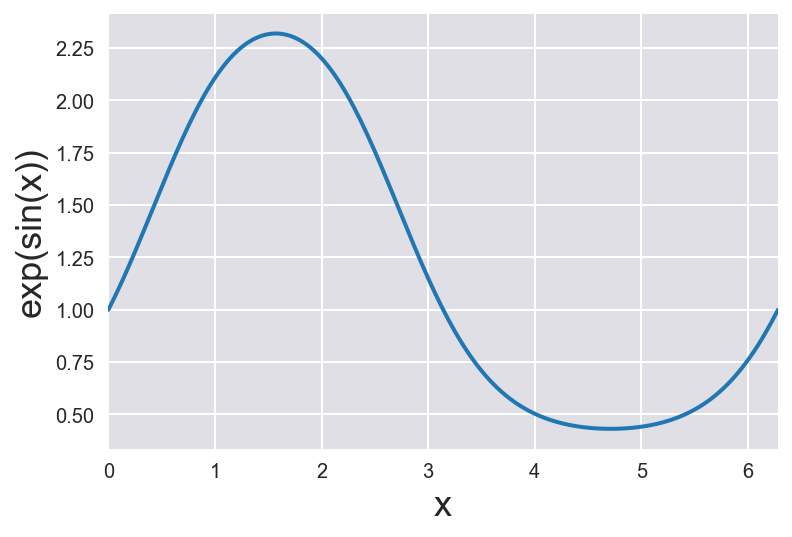

In [10]:
# Generate data to plot
x = np.linspace(0, 2 * np.pi, 200)
y = np.exp(np.sin(np.sin(x)))

# Make plot
plt.plot(x, y)
plt.xlim((0, 2 * np.pi))
plt.xlabel('x')
plt.ylabel('exp(sin(x))')

# Make it interactive with Bokeh
#bokeh.plotting.show(bokeh.mpl.to_bokeh())

In [15]:
def lorenz_attractor(r, t, p):
    """
    Compute the right hand side of system of ODEs for Lorenz attractor.
    
    Parameters
    ----------
    r : array_like, shape (3,)
        (x, y, z) position of trajectory.
    t : dummy_argument
        Dummy argument, necessary to pass function into 
        scipy.integrate.odeint
    p : array_like, shape (3,)
        Parameters (s, k, b) for the attractor.
        
    Returns
    -------
    output : ndarray, shape (3,)
        Time derivatives of Lorenz attractor.
        
    Notes
    -----
    .. Returns the right hand side of the system of ODEs describing
       the Lorenz attractor.
        x' = s * (y - x)
        y' = x * (k - z) - y
        z' = x * y - b * z
    """
    # Unpack variables and parameters
    x, y, z = r
    s, p, b = p
    
    return np.array([s * (y - x), 
                     x * (p - z) - y, 
                     x * y - b * z])

Text(0.5,1,'$x$-$z$ proj. of Lorenz attractor traj.')

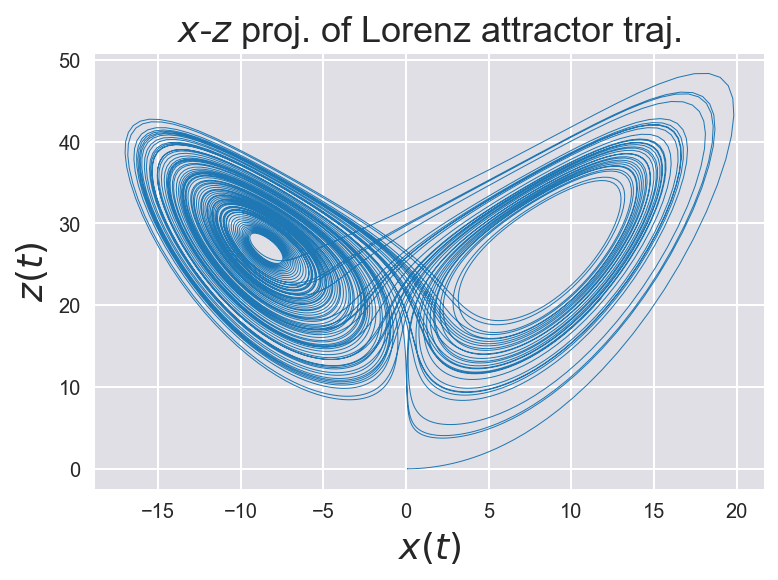

In [16]:
# Parameters to use
p = np.array([10.0, 28.0, 8.0 / 3.0])

# Initial condition
r0 = np.array([0.1, 0.0, 0.0])

# Time points to sample
t = np.linspace(0.0, 80.0, 10000)

# Use scipy.integrate.odeint to integrate Lorentz attractor
r = scipy.integrate.odeint(lorenz_attractor, r0, t, args=(p,))

# Unpack results into x, y, z.
x, y, z = r.transpose()

# Plot the result
plt.plot(x, z, '-', linewidth=0.5)
plt.xlabel(r'$x(t)$', fontsize=18)
plt.ylabel(r'$z(t)$', fontsize=18)
plt.title(r'$x$-$z$ proj. of Lorenz attractor traj.')